In [1]:
import ast
import json
import pandas as pd

import pandas as pd

# Read organizations:
organizations = pd.read_json('files/organizations_dump_010621.json', orient='values')
organizations.rename(columns = {"id":"organizationId"}, inplace=True)
print(organizations.organizationId)

# Read records:
records = pd.read_json('files/records_dump_010621.json', orient='values')
print(records.organizationId)

# Get orgnames:
org_names = pd.read_json('files/orgs.json', orient='values')
print(org_names)

0     961181399
1     920125298
2     974760673
3     986128433
4     985399077
5     991825827
6     821311632
7     971040238
8     960885406
9     974761076
10    971526920
11    998049636
12    921133642
13    840747972
14    972418013
15    974788985
Name: organizationId, dtype: int64
0      920125298
1      974760673
2      974760673
3      991825827
4      974761076
         ...    
153    985399077
154    974788985
155    985399077
156    991825827
157    991825827
Name: organizationId, Length: 158, dtype: int64
     organizationId                                  norwegianRegistry  \
0         983544622  https://data.brreg.no/enhetsregisteret/api/enh...   
1         971526920  https://data.brreg.no/enhetsregisteret/api/enh...   
2         971527412  https://data.brreg.no/enhetsregisteret/api/enh...   
3         840747972  https://data.brreg.no/enhetsregisteret/api/enh...   
4         974761076  https://data.brreg.no/enhetsregisteret/api/enh...   
..              ...           

In [2]:
# join:
# dfj = pd.merge(organizations, records, how='left', left_on='id', right_on='organizationId')
dfj = pd.concat([organizations,records], join="outer", sort=False)
print(dfj)

                          _id  organizationId  __v                 createdAt  \
0    5e1ededfac002d001161934e       961181399    0  2020-01-15T09:43:59.446Z   
1    5e205f0aac002d0011619352       920125298    0  2020-01-16T13:03:06.105Z   
2    5e30333424be7c001198402a       974760673    0  2020-01-28T13:12:20.695Z   
3    5e33da0d24be7c001198402e       986128433    0  2020-01-31T07:41:01.188Z   
4    5e3bdbdc24be7c0011984057       985399077    0  2020-02-06T09:26:52.383Z   
..                        ...             ...  ...                       ...   
153  60911295cbe00d00118bb6a3       985399077    0  2021-05-04T09:23:33.052Z   
154  609a2b3dcbe00d00118bb837       974788985    0  2021-05-11T06:59:09.800Z   
155  60b0e9127d05df0012ec9f83       985399077    0  2021-05-28T12:58:58.554Z   
156  60b4a2117d05df0012eca066       991825827    0  2021-05-31T08:45:05.836Z   
157  60b4a2127d05df0012eca068       991825827    0  2021-05-31T08:45:06.857Z   

                          dataControlle

In [3]:
dfg = dfj.groupby('organizationId').id.nunique()
print(dfg)
dfgj = pd.merge(dfg, org_names, how='left', left_on='organizationId', right_on='organizationId')
print(dfgj)
# slice
dfgj_sliced = dfgj[['organizationId', 'name', 'id']]
print(dfgj_sliced)

organizationId
821311632      0
840747972      0
874789542      1
920125298      1
921133642      8
960885406      0
961181399      0
971040238      0
971526920      0
972418013      2
974760673      2
974761076      7
974788985      1
985399077    120
986128433      0
991825827     16
998049636      0
Name: id, dtype: int64
    organizationId   id                                  norwegianRegistry  \
0        821311632    0  https://data.brreg.no/enhetsregisteret/api/enh...   
1        840747972    0  https://data.brreg.no/enhetsregisteret/api/enh...   
2        874789542    1  https://data.brreg.no/enhetsregisteret/api/enh...   
3        920125298    1  https://data.brreg.no/enhetsregisteret/api/enh...   
4        921133642    8  https://data.brreg.no/enhetsregisteret/api/enh...   
5        960885406    0  https://data.brreg.no/enhetsregisteret/api/enh...   
6        961181399    0  https://data.brreg.no/enhetsregisteret/api/enh...   
7        971040238    0  https://data.brreg.no/en

<AxesSubplot:xlabel='name', ylabel='#records'>

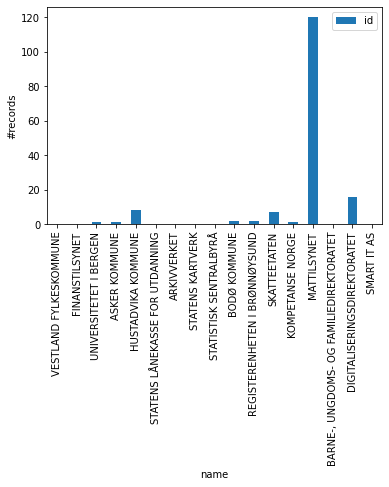

In [81]:
import matplotlib.pyplot as plt
dfgj_sliced.plot(x='name', y='id', ylabel= "#records", kind="bar")

In [24]:
# Andel draft vs published:
all = records.status.value_counts()
print(all)
pr_group = records.groupby('organizationId').status.value_counts()
print(pr_group)

APPROVED    93
DRAFT       65
Name: status, dtype: int64
organizationId  status  
874789542       DRAFT        1
920125298       DRAFT        1
921133642       APPROVED     7
                DRAFT        1
972418013       APPROVED     1
                DRAFT        1
974760673       DRAFT        2
974761076       DRAFT        7
974788985       DRAFT        1
985399077       APPROVED    81
                DRAFT       39
991825827       DRAFT       12
                APPROVED     4
Name: status, dtype: int64
